In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('wine.csv')

In [4]:
df.head(5)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


<AxesSubplot:xlabel='Type', ylabel='count'>

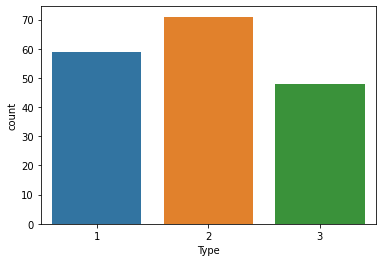

In [6]:
sns.countplot(data=df,x='Type')

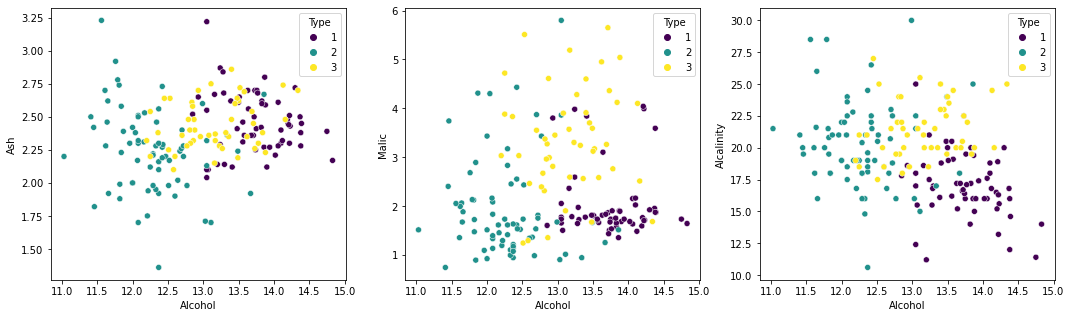

In [7]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5))
sns.scatterplot(data=df,x='Alcohol',y='Ash',hue='Type',palette='viridis',ax=ax1)
sns.scatterplot(data=df,x='Alcohol',y='Malic',hue='Type',palette='viridis',ax=ax2)
sns.scatterplot(data=df,x='Alcohol',y='Alcalinity',hue='Type',palette='viridis',ax=ax3)
plt.show()

In [8]:
Xdf = df.drop('Type',axis=1)

### Scaling data

In [9]:
sd = StandardScaler()
sd_df = sd.fit_transform(Xdf)

In [10]:
df_pca = sd_df

### PCA 
#### Model tuning

In [11]:
exp_var = []

for n in range(1,14):
    pca = PCA(n_components=n)
    pca.fit(df_pca)
    
    exp_var.append(np.sum(pca.explained_variance_ratio_))

In [12]:
explained_variance = pd.DataFrame(data=exp_var,index=range(1,14))
explained_variance

,0
1,0.361988
2,0.554063
3,0.665300
4,0.735990
5,0.801623
6,0.850981
7,0.893368
8,0.920175
9,0.942397
10,0.961697


#### 92% information retaintion in 8 components.

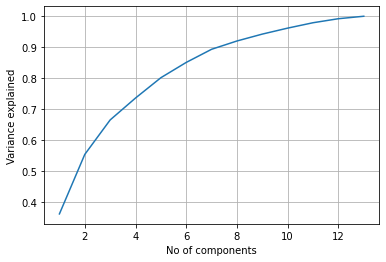

In [13]:
plt.plot(range(1,14),exp_var)
plt.xlabel('No of components')
plt.ylabel('Variance explained')
plt.grid(True)

#### As observed after 8 components there isn't much gain per added component.

In [14]:
pca= PCA(n_components=8)
pca_vals = pca.fit_transform(df_pca)

In [15]:
pca_vals

array([[ 3.31675081, -1.44346263, -0.16573904, ..., -0.22388013,
         0.59642655,  0.06513909],
       [ 2.20946492,  0.33339289, -2.02645737, ..., -0.92712024,
         0.05377561,  1.02441595],
       [ 2.51674015, -1.0311513 ,  0.98281867, ...,  0.54927605,
         0.42420545, -0.34421613],
       ...,
       [-2.67783946, -2.76089913, -0.94094188, ...,  0.27306792,
         0.67923541,  0.0470238 ],
       [-2.38701709, -2.29734668, -0.5506962 , ...,  1.17878298,
         0.63397527,  0.39082877],
       [-3.20875816, -2.76891957,  1.01391366, ...,  0.29609218,
         0.00574126, -0.29291373]])

In [16]:
listt = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8']

In [17]:
pca_df = pd.DataFrame(data=pca_vals[:,0:8],columns=listt)

In [18]:
final_df = pd.concat([pca_df,df['Type']],axis=1)

In [19]:
final_df.head(3)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,Type
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,1


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

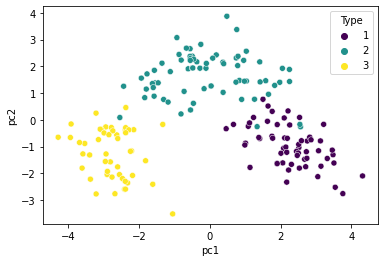

In [20]:
sns.scatterplot(data=final_df,x='pc1',y='pc2',hue='Type',palette='viridis')

#### We can see that only a few points about 3-4 are classified incorrectly.

<AxesSubplot:>

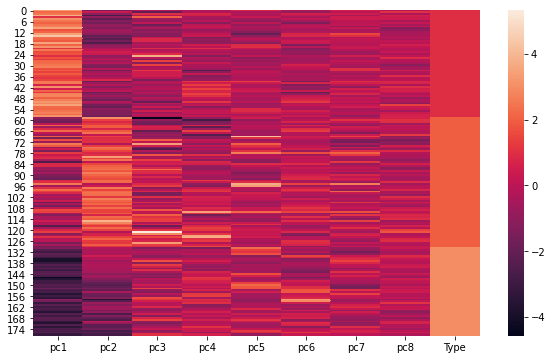

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(final_df)

### KMeans
#### Model tuning

In [22]:
ssd = []

for n in range(1,10):
    kms = KMeans(n_clusters=n)
    kms.fit_predict(pca_df)
    ssd.append(kms.inertia_)
    

Text(0.5, 1.0, 'Elbow method for finding optimal value of k')

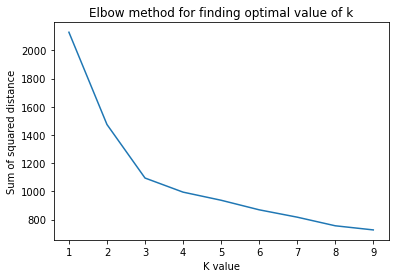

In [23]:
plt.plot(range(1,10),ssd)
plt.xlabel('K value')
plt.ylabel('Sum of squared distance')
plt.title('Elbow method for finding optimal value of k')

#### Optimal value for k is 3, which matches the number of clusters in the original dataset.

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

### When we use only 3 principal components

In [24]:
pca= PCA(n_components=3)
pca_vals = pca.fit_transform(df_pca)

In [25]:
listt = ['pc1','pc2','pc3']
pca_df = pd.DataFrame(data=pca_vals[:,0:3],columns=listt)

In [26]:
pca_df.head(3)

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819


In [27]:
ssd = []

for n in range(1,10):
    kms = KMeans(n_clusters=n)
    kms.fit_predict(pca_df)
    ssd.append(kms.inertia_)

Text(0.5, 1.0, 'Elbow method for finding optimal value of k')

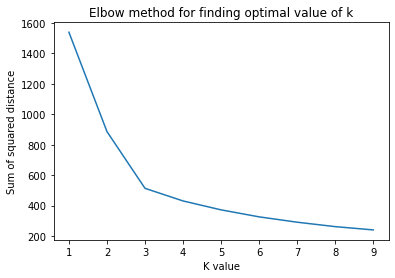

In [28]:
plt.plot(range(1,10),ssd)
plt.xlabel('K value')
plt.ylabel('Sum of squared distance')
plt.title('Elbow method for finding optimal value of k')

#### Optimal value for k is 3, which means we can still identify same number of clusters as that in the original dataset.